In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'E:/movies/Hollywood/creditcard.csv/creditcard.csv'
df = pd.read_csv(file_path)


In [2]:
# Data Preprocessing
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df.drop(['Time'], axis=1, inplace=True)

# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']


In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Model selection and training
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter for convergence
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)


In [5]:
# Evaluate models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    results[name] = {
        'precision': report['1']['precision'], 
        'recall': report['1']['recall'], 
        'f1-score': report['1']['f1-score'], 
        'ROC AUC': roc_auc
    }


<Figure size 1000x600 with 0 Axes>

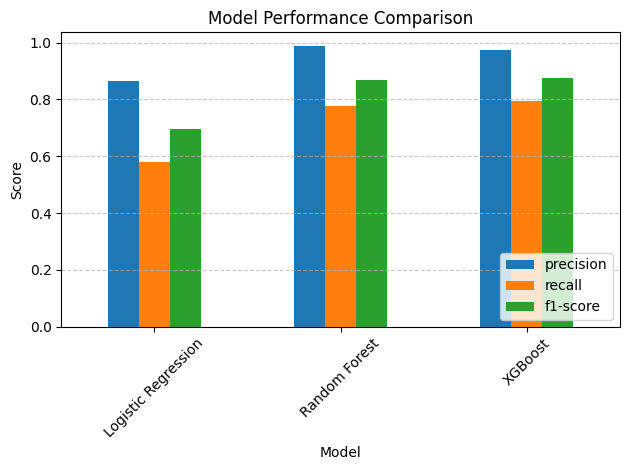

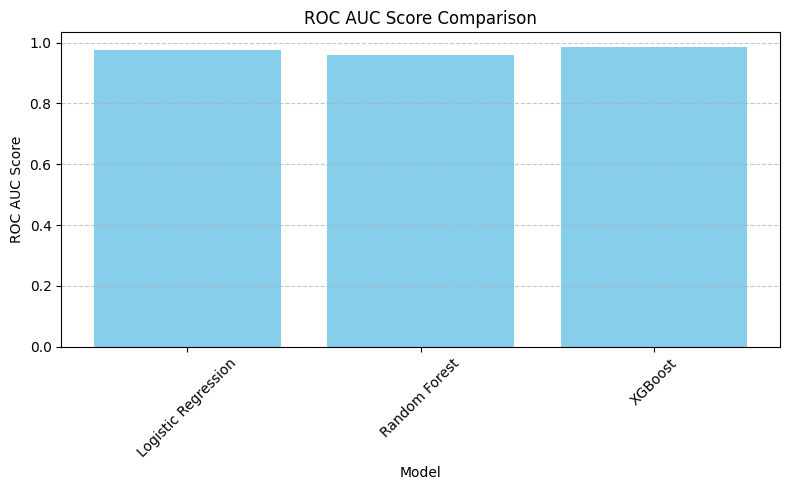

                     precision    recall  f1-score   ROC AUC
Logistic Regression   0.863636  0.581633  0.695122  0.976214
Random Forest         0.987013  0.775510  0.868571  0.957769
XGBoost               0.975000  0.795918  0.876404  0.984454


In [6]:
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Plotting
plt.figure(figsize=(10, 6))
results_df.drop('ROC AUC', axis=1).plot(kind='bar', rot=45)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display ROC AUC comparison
plt.figure(figsize=(8, 5))
plt.bar(results_df.index, results_df['ROC AUC'], color='skyblue')
plt.title('ROC AUC Score Comparison')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display results DataFrame
print(results_df)


In [7]:
# Function to predict if a transaction is fraudulent
def predict_fraud(transaction, scaler, models):
    # Create a DataFrame for the transaction
    transaction_df = pd.DataFrame([transaction])
    # Preprocess the transaction
    transaction_df['Amount'] = scaler.transform(transaction_df[['Amount']])
    # Predict with each model
    predictions = {}
    for name, model in models.items():
        prediction = model.predict(transaction_df)
        predictions[name] = 'Fraud' if prediction[0] == 1 else 'Not Fraud'
    return predictions

# Example transaction to predict (values should match the features used)
sample_transaction = {
    'V1': -1.3598071336738,
    'V2': -0.0727811733098497,
    'V3': 2.53634673796914,
    'V4': 1.37815522427443,
    'V5': -0.338320769942518,
    'V6': 0.462387777762292,
    'V7': 0.239598554061257,
    'V8': 0.0986979012610507,
    'V9': 0.363786969611213,
    'V10': 0.0907941719789316,
    'V11': -0.551599533260813,
    'V12': -0.617800855762348,
    'V13': -0.991389847235408,
    'V14': -0.311169353699879,
    'V15': 1.46817697209427,
    'V16': -0.470400525259478,
    'V17': 0.207971241929242,
    'V18': 0.0257905801985591,
    'V19': 0.403992960255733,
    'V20': 0.251412098239705,
    'V21': -0.018306777944153,
    'V22': 0.277837575558899,
    'V23': -0.110473910188767,
    'V24': 0.0669280749146731,
    'V25': 0.128539358273528,
    'V26': -0.189114843888824,
    'V27': 0.133558376740387,
    'V28': -0.0210530534538215,
    'Amount': 149.62
}

# Predict if the example transaction is fraudulent
predictions = predict_fraud(sample_transaction, scaler, models)
print(predictions)


{'Logistic Regression': 'Not Fraud', 'Random Forest': 'Not Fraud', 'XGBoost': 'Not Fraud'}
